In [2]:
import os
import urllib
import pandas as pd
import numpy as np
from numpy import linalg
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

In [33]:
X = 2 * np.random.rand(200, 1)
y = 4 + 3 * X + np.random.randn(200, 1)

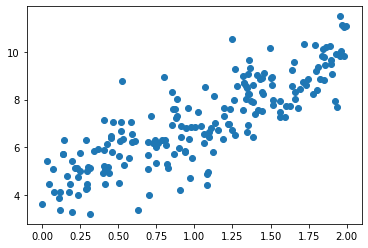

In [34]:
plt.scatter(X, y)

In [38]:
X_b = np.c_[np.ones((200, 1)), X]
theta_best = linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [41]:
theta_best

array([[4.22971283],
       [2.74686507]])

In [81]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.22971283],
       [9.72344296]])

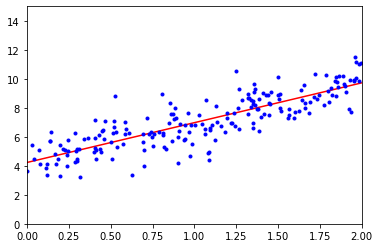

In [82]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.show()

In [83]:
#the same code using scikit
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_


(array([4.22971283]), array([[2.74686507]]))

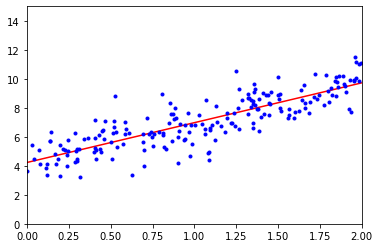

In [86]:
y_pred = lin_reg.predict(X_new)
plt.plot(X_new, y_pred, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.show()
#result is the same

In [89]:
iters = 1000
eta = 0.1
theta = np.random.rand(2, 1)
m = 200
for iteration in range(iters):
    grads = (2/m) * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * grads

In [90]:
theta  #same result 

array([[4.22971283],
       [2.74686507]])

In [91]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

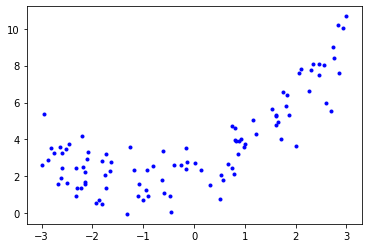

In [94]:
plt.plot(X, y, 'b.')

In [108]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)  # (X, X**2)
X_poly[0]

array([-2.51488704,  6.32465681])

In [111]:
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)
poly_reg.intercept_, lin_reg.coef_

(array([2.21931908]), array([[1.01748091, 0.4731428 ]]))

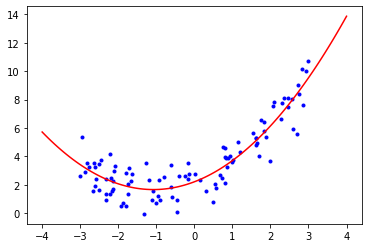

In [119]:
X_new=np.linspace(-4, 4, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = poly_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", label="Predictions")